In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('data/training_data.csv') 
test = pd.read_csv('data/testing_data.csv')
train.head()

,Unnamed: 0,ID,Salary,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0,0,200000,Bangalore,m,1990-01-15,55.5,state board,2007.0,52.5,...,-1,-1,-1,-1,-1,NaN,-0.6201,-0.1437,0.9066,-1.6273
1,1,1,190000,Chennai,m,1990-11-02,83.0,state board,NaN,86.0,...,-1,-1,-1,313,-1,-0.1590,0.8784,0.7785,0.1459,1.2470
2,2,2,335000,Chennai & Mumbai,m,1991-07-31,81.2,cbse,2008.0,75.4,...,500,-1,-1,-1,-1,-1.0208,-1.1196,-0.6048,0.5262,0.2889
3,3,3,325000,Noida,m,1990-07-16,85.0,cbse,2008.0,68.6,...,-1,-1,-1,-1,-1,-0.9969,0.0328,-0.3440,0.7086,-1.2354
4,4,4,360000,Chennai,m,1991-07-14,89.9,state board,NaN,84.5,...,-1,-1,-1,-1,-1,1.2772,0.8784,0.4711,-0.7415,0.4805


# DATA ANALYSIS

In [3]:
#print(train['10board'].unique)
columns = train.columns.tolist()
for column in columns:
    print(column + ":")
    print(train[column].unique())

Unnamed: 0:
[   0    1    2 ... 2997 2998 2999]
ID:
[   0    1    2 ... 2997 2998 2999]
Salary:
[ 200000  190000  335000  325000  360000  100000 1200000  705000  420000
  700000  480000  240000  775000  515000  650000  350000  395000  260000
  150000  600000  115000  250000  320000   95000  470000  460000  280000
  345000  445000  180000  440000 3000000  220000  215000  300000  120000
  485000  145000  270000  315000  370000  630000  330000  305000  310000
  295000  450000  400000  430000  105000  265000  730000  500000  555000
  415000  550000  505000  340000  160000  375000  275000   60000  135000
  205000  225000  170000  210000  365000  140000  195000  620000  455000
   85000  110000  290000  235000  405000  390000  245000  930000  435000
  385000  255000  950000  560000  230000   70000  640000  185000  425000
  175000   80000  565000   75000  155000  715000  610000  880000  725000
  355000  165000 1000000  675000   50000  530000   90000 1320000  410000
  660000  510000  380000  49

In [4]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_columns', 40)
(train.describe(include = 'all').iloc[0:1,:])



,Unnamed: 0,ID,Salary,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3000.0,3000.0,3000.0,3000,3000,3000,2808.0,3000,2555.0,3000.0,3000,3000.0,3000.0,3000,2848,3000.0,2843.0,3000.0,3000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,2749.0,3000.0,3000.0,2544.0,3000.0


In [5]:
(test.describe(include = 'all').iloc[0:1,:])

,Unnamed: 0,ID,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,998.0,998.0,998,998,998,950.0,998,843.0,998.0,998,998.0,998.0,998,950,998.0,955.0,998.0,998,998.0,998.0,998.0,998.0,998.0,998.0,998.0,998.0,998.0,998.0,998.0,998.0,901.0,998.0,998.0,842.0,998.0


### Sex

no. of male = 2288
 no. of female = 712
               Salary
Gender               
f       297942.415730
m       306874.562937


Text(0, 0.5, 'Salary')

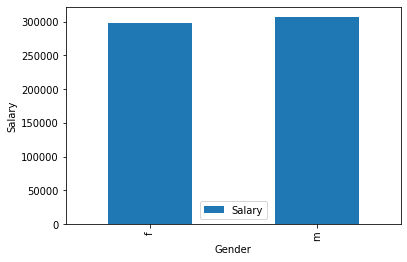

In [6]:

print("no. of male = " + str((train['Gender']=='m').sum()) +  "\n no. of female = " + str((train['Gender']=='f').sum()))
sex_distribution = train.pivot_table(index= "Gender"  , values= "Salary")
print(sex_distribution)
train['Gender'] = train['Gender'].map({'f': 0 , 'm':1})            #0 for female
test['Gender'] = test['Gender'].map({'f': 0 , 'm':1})              #1 for male
sex_distribution.plot.bar()
plt.ylabel('Salary')

### Date of birth/Age

In [7]:
#plt.plot(train[['DOB' , 'Salary']].sort_values('DOB')['DOB'], train[['DOB' , 'Salary']].sort_values('DOB')['Salary'])
#plt.xlabel("DOB")
#plt.ylabel("salary")

In [8]:
#train[['DOB' , 'Salary']].sort_values('DOB')

Text(0.5, 0, 'age')

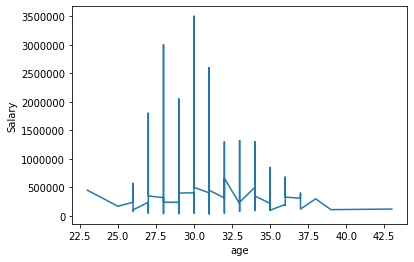

In [9]:
year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year
temp = train['DOB'].map(year)
temp_test = test['DOB'].map(year)

age = 2020 - temp
age_test = 2020 - temp_test

train['age'] = age
test['age'] = age_test

test = test.drop(columns=['DOB'])
train = train.drop(columns=['DOB'])

plt.plot(train.sort_values('age')['age'], train.sort_values('age')['Salary'])
plt.ylabel('Salary')
plt.xlabel('age')
#train['age'].plot.hist(alpha=0.5, color = 'red', bins=50)

Text(0, 0.5, 'age')

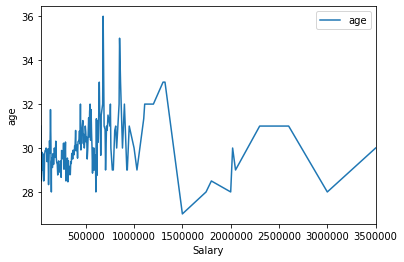

In [10]:
age_distribution = train.pivot_table(index= "Salary"  , values= "age")
age_distribution.plot()
plt.ylabel('age')

### 10percentage

count    2808.000000
mean     77.942372  
std      9.889565   
min      43.000000  
25%      71.575000  
50%      79.330000  
75%      85.670000  
max      97.760000  
Name: 10percentage, dtype: float64
nan_values= 192


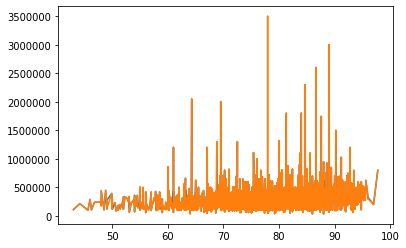

In [11]:
print(train['10percentage'].describe())
plt.plot(train.sort_values('10percentage')['10percentage'], train.sort_values('10percentage')['Salary'])
print("nan_values= " +str((train['10percentage'].isna()).sum()))
train['10percentage'] = train['10percentage'].fillna(train['10percentage'].mean())
test['10percentage'] = test['10percentage'].fillna(test['10percentage'].mean())
plt.plot(train.sort_values('10percentage')['10percentage'], train.sort_values('10percentage')['Salary'])


### Degree

In [12]:
#print(train['Degree'].unique())
categorizer = LabelEncoder()
train['Degree']= categorizer.fit_transform(train['Degree'])
test['Degree']= categorizer.transform(test['Degree'])

### conscientiousness, nueroticism;

In [13]:
train['conscientiousness']= train['conscientiousness'].fillna(train['conscientiousness'].mean())
test['conscientiousness']= test['conscientiousness'].fillna(test['conscientiousness'].mean())

In [14]:
train['nueroticism']= train['nueroticism'].fillna(train['nueroticism'].mean())
test['nueroticism']= test['nueroticism'].fillna(test['nueroticism'].mean())

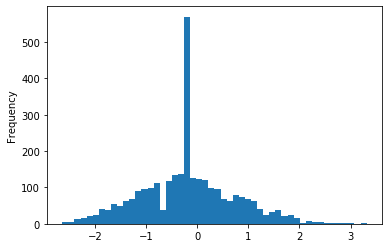

In [15]:
train['nueroticism'].plot.hist(bins=50)

### CollegeState 

In [16]:
categorizer1 = LabelEncoder()
train['CollegeState']= categorizer1.fit_transform(train['CollegeState'])
test['CollegeState']= categorizer1.transform(test['CollegeState'])

college_distribution = train.pivot_table(index= "CollegeID"  , values= "Salary")
college_distribution.plot.bar()


college_distribution.sort_values('Salary', ascending = False)

college_distribution['CollegeID']

In [17]:
train['CollegeCityID'] = train['CollegeCityID'].fillna(-1)
test['CollegeCityID'] = test['CollegeCityID'].fillna(-1)

### Graduation Year

In [18]:
train['GraduationYear'].unique()

array([2013, 2012, 2014, 2010, 2011, 2015, 2009, 2016, 2017,    0])

In [19]:
test['GraduationYear'].unique()

array([2014, 2012, 2013, 2011, 2010, 2015, 2009, 2017, 2007])

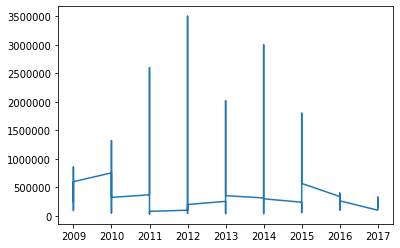

In [20]:
plt.plot(train[train['GraduationYear'] !=0].sort_values('GraduationYear')['GraduationYear'], train[train['GraduationYear'] !=0].sort_values('GraduationYear')['Salary'])

In [21]:
test['GraduationYear'].value_counts()

2013    298
2014    270
2012    217
2011    108
2010    81 
2015    18 
2009    3  
2017    2  
2007    1  
Name: GraduationYear, dtype: int64

In [22]:
test[test['GraduationYear'] ==2007]


,Unnamed: 0,ID,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
368,3368,3368,Hyderabad,1,83.5,ap state board,2003.0,87.3,ap intermediate board,12487,2,0,information technology,64.7,12487.0,0,0,2007,425,575,645,-1.0,-1,-1,-1,-1,-1,-1,-1,-1.4992,-0.7863,-2.0131,-0.165692,-0.6035,34


In [23]:
train.loc[2007,'GraduationYear'] = 2013
test.loc[368,'GraduationYear'] = 2013

In [24]:
categorizer2 = LabelEncoder()
train['GraduationYear']= categorizer2.fit_transform(train['GraduationYear'])
test['GraduationYear']= categorizer2.transform(test['GraduationYear'])

### College GPA 

In [25]:
index = train[train['collegeGPA']<=10].index.tolist()
index1 = test[test['collegeGPA']<=10].index.tolist()


In [26]:
train.loc[index, 'collegeGPA'] = train.loc[index, 'collegeGPA']*9.6
test.loc[index1, 'collegeGPA'] = test.loc[index1, 'collegeGPA']*9.6

In [27]:
(train['collegeGPA'] == 0).sum()

0

### 12 graduation

In [28]:
train['12graduation'] = train['12graduation'].fillna(-1)
test['12graduation'] = test['12graduation'].fillna(-1)

In [29]:
(test['12graduation'].value_counts())

 2009.0    222
 2008.0    200
 2010.0    164
-1.0       155
 2007.0    107
 2006.0    93 
 2005.0    25 
 2004.0    14 
 2011.0    10 
 2003.0    4  
 2012.0    3  
 2002.0    1  
Name: 12graduation, dtype: int64

In [30]:
(train['12graduation'].value_counts())

 2009.0    665
 2008.0    603
 2010.0    459
-1.0       445
 2007.0    349
 2006.0    256
 2005.0    114
 2004.0    47 
 2011.0    27 
 2003.0    17 
 2002.0    10 
 2012.0    3  
 2001.0    2  
 1998.0    1  
 1995.0    1  
 2013.0    1  
Name: 12graduation, dtype: int64

In [31]:
categorizer3 = LabelEncoder()
train['12graduation']= categorizer3.fit_transform(train['12graduation'])
test['12graduation']= categorizer3.transform(test['12graduation'])

### 12 boards 

In [32]:
train['12board'].value_counts()

cbse                                                            1047
state board                                                     943 
0                                                               269 
icse                                                            91  
up board                                                        62  
                                                                ..  
board of high school and intermediate education uttarpradesh    1   
pre university board, karnataka                                 1   
biec patna                                                      1   
nagpur divisional board                                         1   
department of pre-university eduction                           1   
Name: 12board, Length: 282, dtype: int64

In [33]:
test['12board'].value_counts()

cbse                                                     353
state board                                              311
0                                                        90 
icse                                                     38 
up board                                                 25 
                                                         .. 
ap intermediate board                                    1  
bteup                                                    1  
jaycee matriculation school                              1  
haryana state board of technical education chandigarh    1  
international baccalaureate (ib) diploma                 1  
Name: 12board, Length: 110, dtype: int64

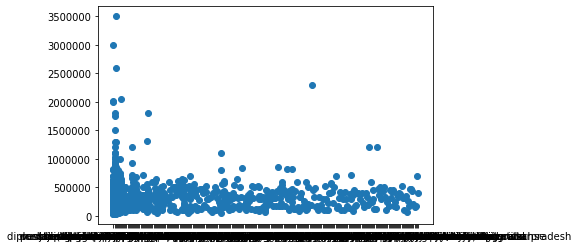

In [34]:
plt.scatter(train['12board'], train['Salary'])

In [35]:
index3 = train[train['12board']== 'board of intermediate'].index.tolist()
train.loc[index3, '12board'] = 'board of intermediate education'
index4 = test[test['12board']== 'board of intermediate'].index.tolist()
test.loc[index4, '12board'] = 'board of intermediate education'

index5 = train[train['12board']== 'central board of secondary education'].index.tolist()
train.loc[index5, '12board'] = 'cbse'
index6 = test[test['12board']== 'central board of secondary education'].index.tolist()
test.loc[index6, '12board'] = 'cbse'

index7 =  train[train['12board'].isin(['up', 'u p board'])].index.tolist()
train.loc[index7, '12board'] = 'up board'
index8 =  test[test['12board'].isin(['up', 'u p board'])].index.tolist()
test.loc[index8, '12board'] = 'up board'

index9 = train[train['12board'].isin(['up board', 'cbse', 'state board', 'icse', 'isc','board of intermediate education', '0', 'rbse', 'chse' , 'wbchse', 'ipe', 'bie', 'intermediate' ])].index
index10 = train.index
index11 = [x for x in index10 if x not in index9]
train.loc[index11, '12board'] = 'state board'

index12 = test[test['12board'].isin(['up board', 'cbse', 'state board', 'icse', 'isc','board of intermediate education', '0', 'rbse', 'chse' , 'wbchse', 'ipe', 'bie', 'intermediate' ])].index
index13 = test.index
index14 = [x for x in index13 if x not in index12]
test.loc[index14, '12board'] = 'state board'

categorizer5 = LabelEncoder()
train['12board']= categorizer5.fit_transform(train['12board'])
test['12board']= categorizer5.transform(test['12board'])

### 10 boards

In [36]:
train['10board'].value_counts()

cbse                                          1033
state board                                   874 
0                                             265 
icse                                          211 
ssc                                           91  
                                              ..  
board ofsecondary education,ap                1   
uttaranchal shiksha avam pariksha parishad    1   
kea                                           1   
nagpur divisional board                       1   
mumbai board                                  1   
Name: 10board, Length: 226, dtype: int64

In [37]:
test['10board'].value_counts()

cbse                                    362
state board                             290
0                                       85 
icse                                    70 
ssc                                     31 
                                        .. 
bihar school examination board patna    1  
aurangabad board                        1  
bse                                     1  
bseb,patna                              1  
up borad                                1  
Name: 10board, Length: 98, dtype: int64

In [38]:
index17 = train[train['10board'].isin(['central board of secondary education','board of secondary education' ])].index.tolist()
train.loc[index17, '10board'] = 'cbse'
index18 = test[test['10board']== 'central board of secondary education'].index.tolist()
test.loc[index18, '10board'] = 'cbse'

index19 =  train[train['10board'].isin(['up', 'u p board', 'up bord', 'uttar pradesh board','uttar pradesh', 'upboard'])].index.tolist()
train.loc[index19, '10board'] = 'up board'
index20 =  test[test['10board'].isin(['up', 'u p board', 'up bord', 'uttar pradesh board','uttar pradesh', 'upboard'])].index.tolist()
test.loc[index20, '10board'] = 'up board'

index21 = train[train['10board'].isin(['up board', 'cbse', 'icse','sslc','state board','0', 'rbse', 'chse' , 'wbchse', 'ipe', 'bie', 'kseeb', 'intermediate' ])].index
index22 = train.index
index23 = [x for x in index22 if x not in index21]
train.loc[index23, '10board'] = 'state board'

index24 = test[test['10board'].isin(['up board', 'cbse', 'state board', 'icse', 'isc', '0', 'rbse', 'chse' , 'wbchse', 'ipe', 'bie', 'intermediate' ])].index
index25 = test.index
index26 = [x for x in index25 if x not in index24]
test.loc[index26, '10board'] = 'state board'

categorizer6 = LabelEncoder()
train['10board']= categorizer6.fit_transform(train['10board'])
test['10board']= categorizer6.transform(test['10board'])

### Job City

In [39]:
# print("unique cities = "+ str(train ['JobCity'].unique().size))
# jobCity_distribution = train.pivot_table(index= "JobCity"  , values= "Salary")
# print(jobCity_distribution.sort_values('Salary'))
# plt.figure(figsize = (20,20))
# jobCity_distribution.plot.bar()

In [40]:
train['JobCity'].value_counts()

Bangalore                                 486
-1                                        347
Noida                                     264
Hyderabad                                 236
Pune                                      216
                                         ... 
 ariyalur                                 1  
vsakhapttnam                              1  
SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN    1  
Dammam                                    1  
Howrah                                    1  
Name: JobCity, Length: 277, dtype: int64

In [41]:
# test['JobCity'].value_counts()

In [42]:
train['JobCity'] = train['JobCity'].str.lower()
train['JobCity'] = train['JobCity'].str.strip()
test['JobCity'] = test['JobCity'].str.lower()
train['JobCity'] = train['JobCity'].str.strip()
#train['JobCity'].value_counts()

In [43]:
index29 =  train[train['JobCity'].isin(['bangalore', 'banglore' 'bengaluru'])].index.tolist()
train.loc[index29, 'JobCity'] = 'bangalore'
index30 =  test[test['JobCity'].isin(['bangalore ', 'banglore', 'bengaluru'])].index.tolist()
test.loc[index30, 'JobCity'] = 'bangalore'

index31 = train[train['JobCity'].isin(['bangalore', 'noida', '-1','hyderabad','pune','chennai', 'gurgaon', 'new delhi' , 'mumbai', 'kolkata', 'jaipur', 'mysore', 'lucknow', 'navi mumbai', 'bhubaneshwar', 'chandigarh', 'greater noida', 'indore', 'delhi', 'coimbatore', 'bhopal', 'ahmedabad', 'faridabad', 'kochi/cochin', 'mangalore', 'mohali', 'nagpur', 'ghaziabad', 'trivandrum', 'kanpur', 'bhubaneshwar', 'thane', 'patna', 'vishakapatnam', 'dehradun', 'jabalpur', 'pondicherry', 'jodhpur','thiruvananthapuram','raipur', 'nasikity', 'bilaspur', 'gurgaon', 'ranchi' , 'trichy', 'haridwar','madurai', 'aurangabad','secunderabad'  ])].index
index32 = train.index
index33 = [x for x in index32 if x not in index31]
train.loc[index33, 'JobCity'] = 'other'

index34 = test[test['JobCity'].isin(['bangalore', 'noida', '-1','hyderabad','pune','chennai', 'gurgaon', 'new delhi' , 'mumbai', 'kolkata', 'jaipur', 'mysore', 'lucknow', 'navi mumbai', 'bhubaneshwar', 'chandigarh', 'greater noida', 'indore', 'delhi', 'coimbatore', 'bhopal', 'ahmedabad', 'faridabad', 'kochi/cochin', 'mangalore', 'mohali', 'nagpur', 'ghaziabad', 'trivandrum', 'kanpur', 'bhubaneshwar', 'thane', 'patna', 'vishakapatnam', 'dehradun', 'jabalpur', 'pondicherry', 'jodhpur','thiruvananthapuram','raipur', 'nasikity', 'bilaspur', 'gurgaon', 'ranchi' , 'trichy', 'haridwar','madurai', 'aurangabad','secunderabad'  ])].index
index35 = test.index
index36 = [x for x in index35 if x not in index34]
test.loc[index36, 'JobCity'] = 'other'

categorizer7 = LabelEncoder()
train['JobCity']= categorizer7.fit_transform(train['JobCity'])
test['JobCity']= categorizer7.transform(test['JobCity'])

In [44]:
test.head()

,Unnamed: 0,ID,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,3000,3000,0,1,82.200000,1,0,69.80,3,11759,2,0,electronics and communication engineering,62.20,11759.0,0,24,5,520,560,650,0.207392,-1,260,-1,-1,-1,-1,-1,-0.050491,0.0459,1.2396,1.920700,-0.2859,28
1,3001,3001,17,1,81.500000,2,11,83.16,5,436,1,0,electrical engineering,71.44,436.0,0,24,5,605,585,580,0.661834,-1,-1,-1,-1,446,-1,-1,-1.595300,-0.1206,-0.2974,-0.995000,-0.8608,29
2,3002,3002,35,1,74.180000,6,10,73.00,10,272,2,0,electronics and communication engineering,71.19,272.0,0,17,3,355,485,305,0.058793,-1,200,-1,-1,-1,366,-1,-0.881000,-0.7473,-1.2148,1.237400,-0.4455,30
3,3003,3003,3,1,77.753758,6,9,62.50,10,3716,2,3,computer application,75.83,3716.0,1,11,4,490,410,535,0.486747,445,-1,376,-1,-1,-1,-1,-0.446300,-0.2871,-0.6048,0.653000,-1.4356,32
4,3004,3004,15,1,77.753758,1,9,59.20,3,75,2,0,electronics and communication engineering,66.50,75.0,0,23,3,515,465,625,0.538387,-1,333,-1,-1,-1,260,-1,-0.417300,0.9688,0.6720,-0.165692,0.0284,30


### Specialization

In [45]:
train['Specialization'] = train['Specialization'].fillna('-1')
test['Specialization'] = test['Specialization'].fillna('-1')
train['Specialization'] = train['Specialization'].str.strip()
test['Specialization'] = test['Specialization'].str.strip()
# (test['Specialization'].isna()).sum()


In [46]:
test.head()

,Unnamed: 0,ID,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,3000,3000,0,1,82.200000,1,0,69.80,3,11759,2,0,electronics and communication engineering,62.20,11759.0,0,24,5,520,560,650,0.207392,-1,260,-1,-1,-1,-1,-1,-0.050491,0.0459,1.2396,1.920700,-0.2859,28
1,3001,3001,17,1,81.500000,2,11,83.16,5,436,1,0,electrical engineering,71.44,436.0,0,24,5,605,585,580,0.661834,-1,-1,-1,-1,446,-1,-1,-1.595300,-0.1206,-0.2974,-0.995000,-0.8608,29
2,3002,3002,35,1,74.180000,6,10,73.00,10,272,2,0,electronics and communication engineering,71.19,272.0,0,17,3,355,485,305,0.058793,-1,200,-1,-1,-1,366,-1,-0.881000,-0.7473,-1.2148,1.237400,-0.4455,30
3,3003,3003,3,1,77.753758,6,9,62.50,10,3716,2,3,computer application,75.83,3716.0,1,11,4,490,410,535,0.486747,445,-1,376,-1,-1,-1,-1,-0.446300,-0.2871,-0.6048,0.653000,-1.4356,32
4,3004,3004,15,1,77.753758,1,9,59.20,3,75,2,0,electronics and communication engineering,66.50,75.0,0,23,3,515,465,625,0.538387,-1,333,-1,-1,-1,260,-1,-0.417300,0.9688,0.6720,-0.165692,0.0284,30


In [47]:
test.loc[[205,209,788], 'Specialization'] = '-1'

index50 = test[test['Specialization'].isin(['control and instrumentation engineering','internal combustion engine', 'control and instrumentation engineering'])].index.tolist()
test.loc[index50, 'Specialization'] = '-1'

categorizer8 = LabelEncoder()
train['Specialization']= categorizer8.fit_transform(train['Specialization'])
test['Specialization']= categorizer8.transform(test['Specialization'])
# train['Specialization'].value_counts()

In [48]:
test.head()

,Unnamed: 0,ID,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,3000,3000,0,1,82.200000,1,0,69.80,3,11759,2,0,20,62.20,11759.0,0,24,5,520,560,650,0.207392,-1,260,-1,-1,-1,-1,-1,-0.050491,0.0459,1.2396,1.920700,-0.2859,28
1,3001,3001,17,1,81.500000,2,11,83.16,5,436,1,0,16,71.44,436.0,0,24,5,605,585,580,0.661834,-1,-1,-1,-1,446,-1,-1,-1.595300,-0.1206,-0.2974,-0.995000,-0.8608,29
2,3002,3002,35,1,74.180000,6,10,73.00,10,272,2,0,20,71.19,272.0,0,17,3,355,485,305,0.058793,-1,200,-1,-1,-1,366,-1,-0.881000,-0.7473,-1.2148,1.237400,-0.4455,30
3,3003,3003,3,1,77.753758,6,9,62.50,10,3716,2,3,9,75.83,3716.0,1,11,4,490,410,535,0.486747,445,-1,376,-1,-1,-1,-1,-0.446300,-0.2871,-0.6048,0.653000,-1.4356,32
4,3004,3004,15,1,77.753758,1,9,59.20,3,75,2,0,20,66.50,75.0,0,23,3,515,465,625,0.538387,-1,333,-1,-1,-1,260,-1,-0.417300,0.9688,0.6720,-0.165692,0.0284,30


### Drop Columns

In [49]:
IDtest = test['ID']
# train = train.drop(['Unnamed: 0', 'CollegeID', 'CollegeCityID', 'ID', 'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg' , 'ElectricalEngg', 'TelecomEngg', 'CivilEngg' ], axis=1)
# test = test.drop(['Unnamed: 0', 'CollegeID', 'CollegeCityID', 'ID', 'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg' , 'ElectricalEngg', 'TelecomEngg', 'CivilEngg' ], axis=1)
train = train.drop(['Unnamed: 0', 'CollegeID', 'CollegeCityID', 'ID' ], axis=1)
test = test.drop(['Unnamed: 0', 'CollegeID', 'CollegeCityID', 'ID' ], axis=1)

In [50]:

y_train = train['Salary']
train = train.drop(['Salary'], axis=1)

# train.head()

In [51]:
train

,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,3,1,55.5,6,9,52.50,10,2,3,9,72.80,0,23,4,415,495,445,0.864685,525,-1,-1,-1,-1,-1,-1,-0.037404,-0.6201,-0.1437,0.906600,-1.6273,30
1,8,1,83.0,6,0,86.00,10,2,0,20,71.00,1,20,4,555,555,280,0.376060,425,300,-1,-1,-1,313,-1,-0.159000,0.8784,0.7785,0.145900,1.2470,30
2,35,1,81.2,1,10,75.40,3,1,0,10,74.10,0,13,4,495,595,625,0.911395,685,-1,500,-1,-1,-1,-1,-1.020800,-1.1196,-0.6048,0.526200,0.2889,29
3,34,1,85.0,1,10,68.60,3,2,0,0,64.50,0,7,3,585,465,425,0.450877,395,-1,-1,-1,-1,-1,-1,-0.996900,0.0328,-0.3440,0.708600,-1.2354,30
4,8,1,89.9,6,0,84.50,10,2,0,20,68.00,0,11,4,675,485,485,-1.000000,455,-1,-1,-1,-1,-1,-1,1.277200,0.8784,0.4711,-0.741500,0.4805,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,34,0,85.6,1,0,87.20,3,2,0,31,73.00,0,7,4,590,585,705,0.622643,515,-1,407,-1,-1,-1,-1,-1.020800,-0.6201,-0.7585,-0.180071,-1.4356,29
2996,8,1,88.6,6,12,74.16,10,2,0,31,73.10,0,20,5,420,445,415,0.744758,415,-1,438,-1,-1,-1,-1,0.990000,0.3789,0.4711,-1.502100,0.8637,28
2997,34,1,52.0,0,8,55.00,0,2,0,10,65.80,0,23,3,395,350,445,0.276047,345,-1,-1,-1,-1,-1,-1,-1.112800,-2.6193,-1.0697,1.325500,-1.2354,30
2998,7,1,74.6,1,7,80.80,3,2,0,20,72.45,0,23,1,535,415,635,0.960603,-1,466,-1,-1,-1,-1,-1,0.819200,0.3448,1.1074,-0.172700,1.4502,32


In [52]:
test

,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,0,1,82.200000,1,0,69.80,3,2,0,20,62.20,0,24,5,520,560,650,0.207392,-1,260,-1,-1,-1,-1,-1,-0.050491,0.0459,1.2396,1.920700,-0.2859,28
1,17,1,81.500000,2,11,83.16,5,1,0,16,71.44,0,24,5,605,585,580,0.661834,-1,-1,-1,-1,446,-1,-1,-1.595300,-0.1206,-0.2974,-0.995000,-0.8608,29
2,35,1,74.180000,6,10,73.00,10,2,0,20,71.19,0,17,3,355,485,305,0.058793,-1,200,-1,-1,-1,366,-1,-0.881000,-0.7473,-1.2148,1.237400,-0.4455,30
3,3,1,77.753758,6,9,62.50,10,2,3,9,75.83,1,11,4,490,410,535,0.486747,445,-1,376,-1,-1,-1,-1,-0.446300,-0.2871,-0.6048,0.653000,-1.4356,32
4,15,1,77.753758,1,9,59.20,3,2,0,20,66.50,0,23,3,515,465,625,0.538387,-1,333,-1,-1,-1,260,-1,-0.417300,0.9688,0.6720,-0.165692,0.0284,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,35,1,69.000000,6,8,51.30,10,2,0,31,72.00,0,13,5,430,395,235,0.744758,455,-1,438,-1,-1,-1,-1,-0.015400,-1.2861,0.0100,0.272700,-0.4776,33
994,38,1,83.460000,6,10,61.83,10,2,0,31,73.00,0,14,5,430,435,450,0.953900,535,-1,530,-1,-1,-1,-1,0.702700,0.3789,0.3174,-1.121800,0.4805,30
995,17,1,86.340000,6,11,83.70,10,2,0,13,72.19,0,0,4,525,435,620,0.486747,445,-1,376,-1,-1,-1,-1,0.990000,1.0449,1.8543,0.019200,0.0973,29
996,34,1,79.600000,1,11,73.20,3,2,0,20,66.96,1,18,5,535,640,630,0.338786,-1,292,-1,-1,-1,-1,-1,-1.164400,0.2124,0.3174,0.906600,-0.4776,29


# TRAINING MODEL

In [53]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [54]:
# X_train, X_test, Y_train, Y_test = train_test_split(train, y_train, test_size =0.2, random_state = 42)
# X_train

# scalar = StandardScaler()
# X_train=scalar.fit_transform(X_train)
# X_test=scalar.transform(X_test)
# test =scalar.transform(test)
# test


# test



# model = xgb.XGBRegressor(objective='reg:squarederror')
# model.fit(X_train, Y_train)
# p = model.predict(X_test)
# q =  model.predict(test)

# p

# Y_test.values

# q

# final = pd.DataFrame()
# final['ID'] = IDtest
# final['Salary'] = q

# model.score(X_test, Y_test)

# final_csv = final.to_csv("final.csv", index=False)

In [55]:
# final.dtypes

In [56]:
scalar = StandardScaler()
X = scalar.fit_transform(train)
y = y_train.values
test =scalar.transform(test)
test

array([[-1.308754  ,  0.557843  ,  0.4450717 , ...,  2.29725328,
        -0.1394303 , -0.88878501],
       [-0.09474065,  0.557843  ,  0.37189711, ..., -0.89114784,
        -0.70816651, -0.33120345],
       [ 1.19068525,  0.557843  , -0.39330001, ...,  1.55004524,
        -0.29731915,  0.22637811],
       ...,
       [-0.09474065,  0.557843  ,  0.87784712, ...,  0.21790879,
         0.23966123, -0.33120345],
       [ 1.1192727 ,  0.557843  ,  0.17328037, ...,  1.18830601,
        -0.32907499, -0.33120345],
       [-1.09451635,  0.557843  ,  1.38588783, ..., -0.50600709,
        -0.76613823,  1.89912279]])

In [57]:
y.shape

(3000,)

In [58]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)



In [59]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [60]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))



class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 175212.8967 (25473.6474)

ElasticNet score: 175212.4233 (25473.2767)

Kernel Ridge score: 185283.6448 (22631.3329)

Gradient Boosting score: 177871.9366 (22499.2808)

Xgboost score: 188190.7085 (24570.4065)

LGBM score: 178210.8994 (24618.8332)

 Averaged base models score: 174411.3529 (24455.7935)



In [61]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [62]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))



Stacking Averaged models score: 174075.5100 (25063.0738)


In [63]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [64]:
stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
stacked_pred = stacked_averaged_models.predict(test)
print(rmsle(y, stacked_train_pred))

155511.31229399875


In [65]:
model_xgb.fit(X, y)
xgb_train_pred = model_xgb.predict(X)
xgb_pred = model_xgb.predict(test)
print(rmsle(y, xgb_train_pred))

65715.88894766904


In [66]:
model_lgb.fit(X, y)
lgb_train_pred = model_lgb.predict(X)
lgb_pred = model_lgb.predict(test)
print(rmsle(y, lgb_train_pred))

132453.5076887468


In [67]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
135110.8421579092


In [68]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
ensemble

array([256605.80945543, 371726.38242024, 215579.19346664, 242727.21880355,
       308579.27901719, 298586.70182032, 449248.90005788, 390172.66670989,
       172813.80315558, 431757.02900171, 326757.04300159, 381898.05752179,
       258556.49324987, 235733.00159499, 117550.1341678 , 283358.92283619,
       441002.50598649, 452619.61063647, 244950.72594661, 305681.70688606,
       239109.4464308 , 347527.35219478, 295563.91057334, 264750.55435082,
       429274.74498863, 316735.08085486, 463425.58976057, 166148.09298434,
       341737.08201007, 268059.01445202, 196182.57703739, 334183.3234726 ,
       424466.13217906, 392757.33413228, 230875.21469518, 249600.34492493,
       293943.96151014, 325178.60847777, 262406.51628294, 282090.45119248,
       135046.66977743, 240411.6912724 , 186168.62883323, 275657.33016621,
       412946.40710373, 330664.47496052, 440750.70937998, 352801.26107884,
       264597.49937424, 360665.4658127 , 249339.54800024, 252908.16955332,
       253114.62662609, 5

In [69]:
final_ensemble = pd.DataFrame()
final_ensemble['ID'] = IDtest
final_ensemble['Salary'] = ensemble

In [70]:
final_ensembleCSV = final_ensemble.to_csv("final_ensembleCSV.csv", index=False)

In [71]:
xgPred = pd.DataFrame()
xgPred['ID'] = IDtest
xgPred['Salary'] = lgb_pred
XGboost_csv = xgPred.to_csv("XGboost.csv", index=False)

In [72]:
ensemble1 = stacked_pred*0.55 + xgb_pred*0.25 + lgb_pred*0.20
ensemble1

array([260878.99159225, 372410.15585476, 215493.04031415, 239101.68485074,
       307630.83701511, 291724.92960966, 461081.90455161, 390150.96126735,
       169397.9425254 , 436866.52024668, 323586.42937617, 383447.86573679,
       258827.26452484, 229577.61391854, 109426.54522807, 289501.5728082 ,
       440226.93872226, 446890.57723435, 242495.76614471, 307633.94865809,
       244716.05162971, 341987.69750867, 289344.74617567, 267892.76493037,
       434359.69142234, 317840.49599814, 487595.36667134, 158248.86695724,
       346186.11039366, 265486.05802351, 196209.08569139, 328640.47332156,
       412481.52724463, 392772.95661438, 225099.91526981, 240224.38892367,
       290727.15114106, 315662.97956724, 262575.82450234, 286424.66347696,
       132369.17317111, 238590.00720708, 182088.19206374, 277974.44187764,
       428679.88765684, 332679.77079422, 454099.2429852 , 360856.91810068,
       261556.10641358, 355345.5264476 , 250154.34570739, 256604.65281068,
       247670.93867465, 6

In [73]:
final_ensemble1 = pd.DataFrame()
final_ensemble1['ID'] = IDtest
final_ensemble1['Salary'] = ensemble1
final_ensemble1_CSV = final_ensemble1.to_csv("final_ensemble1_CSV.csv", index=False)